## Contents

This script is looking into the frequency of the levels of participation and the models for each level

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math

### 1. Importing Data

In [2]:
#creating a path
path= r'C:\Users\isobr\OneDrive\18042023ParticipationPractices'

In [3]:
path

'C:\\Users\\isobr\\OneDrive\\18042023ParticipationPractices'

In [4]:
#importing the excel dataset
df = pd.read_excel(os.path.join(path, 'practices_full.xlsx'), index_col = False)

In [5]:
df.head()

,ID,title,CS,source,year_pub,year_pro,publisher,link,province_state,country,...,innovation,tax,new jobs,tourism,energy price,property price,livelihoods,eco_imp,imp_score,perceived_imp
0,a1,Popular and institutional opposition to the Se...,yes,Wiki,2022,2021.0,EJ Atlas,https://ejatlas.org/conflict/popular-and-insti...,Catalonia,Spain,...,0,0,1,1,0,0,0,2,6,Moderate negative
1,a2,Proteste gegen Verspargelung und Flächenfraß,yes,News media,2019,2019.0,deutschlandfunk Kultur,https://www.deutschlandfunkkultur.de/windenerg...,Mecklenburg-Western Pomerania,Germany,...,0,0,0,0,0,0,0,0,3,Moderate negative
2,a3,Greta Thunberg has joined a protest against wi...,yes,News media,2023,2021.0,CNN,https://edition.cnn.com/2023/03/01/europe/gret...,Fosen,Norway,...,0,0,0,0,0,0,0,0,3,Moderate negative
3,a4,"Combining offshore wind farms, nature conserva...",no,Journal article,2021,2021.0,Marine Policy,https://www.sciencedirect.com/science/article/...,Not Applicable,Netherlands,...,0,0,1,0,0,0,0,1,4,Neutral
4,a5,Learning from the social impacts associated wi...,yes,Journal article,2021,2008.0,Impact Assessment and Project Appraisal,https://www.tandfonline.com/doi/full/10.1080/1...,Urk,Netherlands,...,1,0,0,1,0,0,1,3,6,Moderate negative


In [6]:
df.shape

(397, 70)

In [7]:
df.columns

Index(['ID', 'title', 'CS', 'source', 'year_pub', 'year_pro', 'publisher',
       'link', 'province_state', 'country', 'region', 'technology',
       'n_turbines', 'capacity', 'local community', 'communities interest',
       'public', 'small investors', 'cooperative', 'NGO', 'organisation',
       'government', 'municipality', 'experts', 'investors', 'turbines',
       'onshore farm', 'offshore farm', 'company', 'policy', 'community ',
       'repowering', 'other', 'mandate', 'main_level', 'level_score',
       'other_levels', 'alibi', 'resistance', 'information', 'consultation ',
       'financial ', 'cooperation ', 'scale', 'timing', 'opportunities',
       'opportunities_score', 'noise', 'shadow-flicker', 'safety', 'health',
       'landuse', 'access energy', 'awareness', 'community fund', 'soc_imp',
       'emissions', 'biodiversity', 'landscape', 'env_imp', 'innovation',
       'tax', 'new jobs', 'tourism', 'energy price', 'property price',
       'livelihoods', 'eco_imp', 'imp_s

In [8]:
df['scale'].value_counts()

Local            172
Regional         115
National          87
Transnational     23
Name: scale, dtype: int64

### 2. Overview of Year and Levels of Participation

In [9]:
capacity=df[df['scale']== 'Regional']

In [10]:
df3 = (
    capacity
    .groupby('main_level')['capacity'].mean()
    .reset_index()
    .sort_values('capacity', ascending = False)
)
df3

,main_level,capacity
0,Alibi,1763.000000
1,Consultation,1595.343030
2,Cooperation,903.092500
6,Resistance,535.061579
5,No participation,417.000000
4,Information,376.225000
3,Financial,315.785714


In [11]:
#creating a new index based on the level of participation
df3.set_index('main_level')

,capacity
main_level,
Alibi,1763.000000
Consultation,1595.343030
Cooperation,903.092500
Resistance,535.061579
No participation,417.000000
Information,376.225000
Financial,315.785714


Text(0.5, 1.0, 'Main Level of Participation by Mean Value of Installed Capacity')

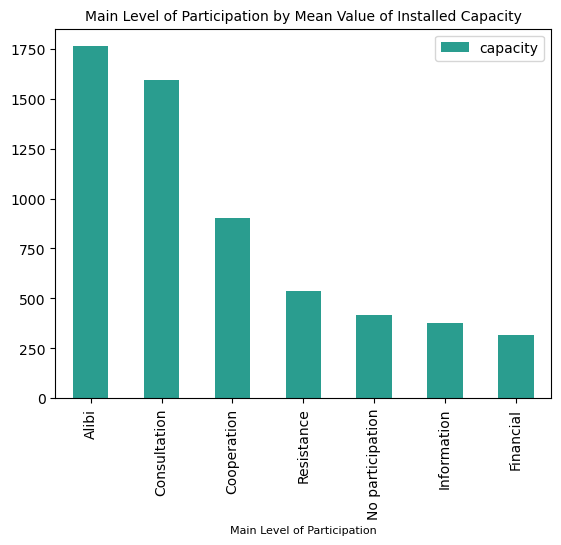

In [12]:
df3.set_index('main_level').plot.bar(color='#2a9d8f')
plt.xlabel('Main Level of Participation', fontsize=8)
plt.title('Main Level of Participation by Mean Value of Installed Capacity', fontsize=10)

Text(0.5, 1.0, 'Installed Capacity')

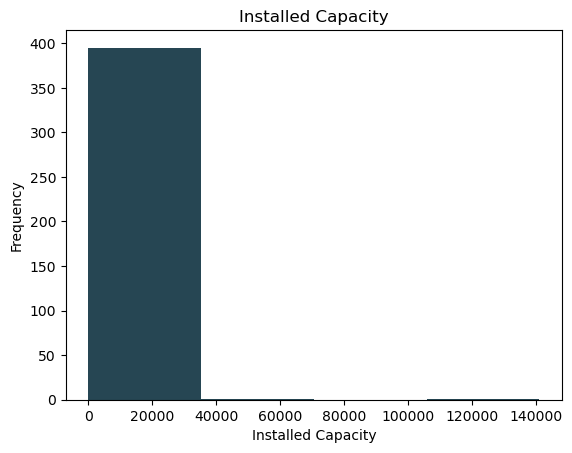

In [13]:
#histogram of year of projects 
hist_practices=df['capacity'].plot.hist(color='#264653', bins = 4)
plt.xlabel('Installed Capacity', fontsize=10)
plt.title('Installed Capacity')

In [14]:
df['year_pub'].describe()

count     397.000000
mean     2020.000000
std         3.666667
min      2000.000000
25%      2019.000000
50%      2021.000000
75%      2023.000000
max      2023.000000
Name: year_pub, dtype: float64

Text(0.5, 1.0, 'Year of Publications')

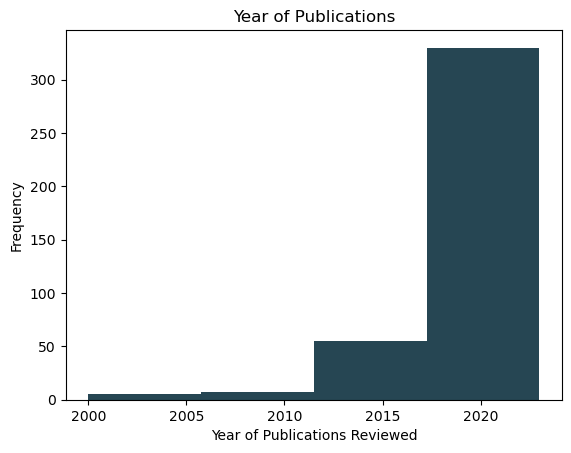

In [15]:
#histogram of year of publications reviewed
hist_pub=df['year_pub'].plot.hist(color='#264653', bins = 4)
plt.xlabel('Year of Publications Reviewed', fontsize=10)
plt.title('Year of Publications')

Text(0.5, 1.0, 'Year of Publications')

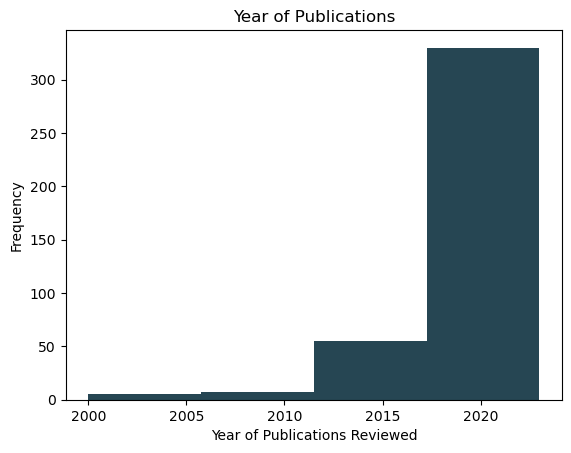

In [16]:
#histogram of year of publications reviewed
hist_cap=df['year_pub'].plot.hist(color='#264653', bins = 4)
plt.xlabel('Year of Publications Reviewed', fontsize=10)
plt.title('Year of Publications')

Text(0.5, 1.0, 'Distribution of Levels of Participation')

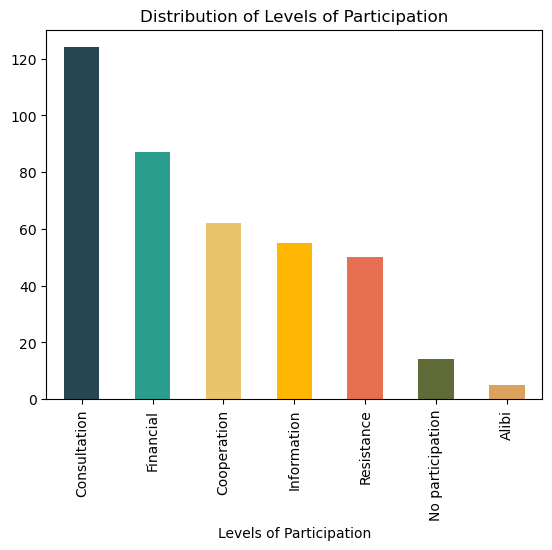

In [17]:
#Distribution of levels of participation
df['main_level'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e'])
plt.xlabel("Levels of Participation", fontsize=10)
plt.title('Distribution of Levels of Participation')

### 3. Mandate, Opportunities and Timing for Participation

In [18]:
#compare mandate with the level of participation
man = (
    df                                                                                       
    .groupby('mandate')['level_score'].mean()                        
    .reset_index()
    .sort_values('level_score', ascending = False)
    .iloc[:10]
)
man

,mandate,level_score
2,Voluntary,4.248175
0,Legal Obligation,3.679487
1,Not applicable,2.711111


Text(0.5, 1.0, 'Mandate for Participation by Score of Participation')

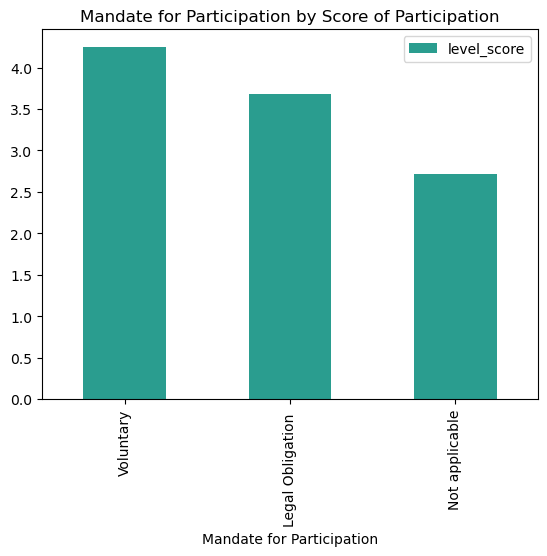

In [19]:
man.set_index('mandate').plot.bar(color = '#2A9D8F')
plt.xlabel("Mandate for Participation", fontsize=10)
plt.title('Mandate for Participation by Score of Participation')

Text(0.5, 1.0, 'Distribution of Opportunities for Participation')

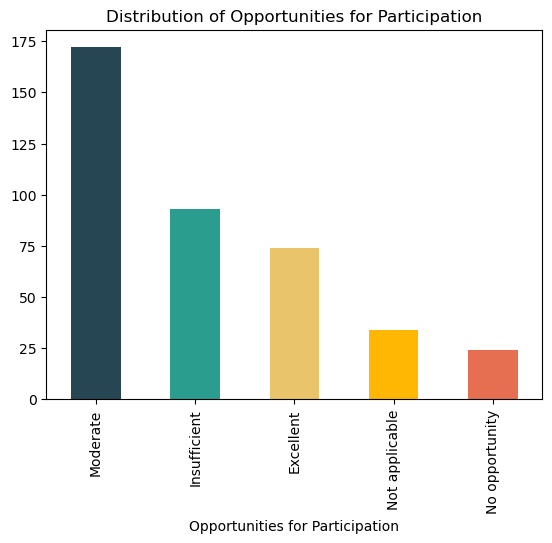

In [20]:
#Distribution of opportunities for participation
df['opportunities'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e'])
plt.xlabel("Opportunities for Participation", fontsize=10)
plt.title('Distribution of Opportunities for Participation')

In [21]:
# compare the timing of participation and opportunities

time = (
    df                                                                                       
    .groupby('timing')['opportunities_score'].mean()                        
    .reset_index()
    .sort_values('opportunities_score', ascending = False)
    .iloc[:10]
)
time

,timing,opportunities_score
7,Throughout,3.347222
4,More than one stage,2.800000
2,Exploration,2.660377
6,Planning,2.645161
3,Maintenance,2.375000
0,Construction,2.166667
5,No information,1.935897
1,Decommission,0.000000


Text(0.5, 1.0, 'Timing of Participation and Opportunities')

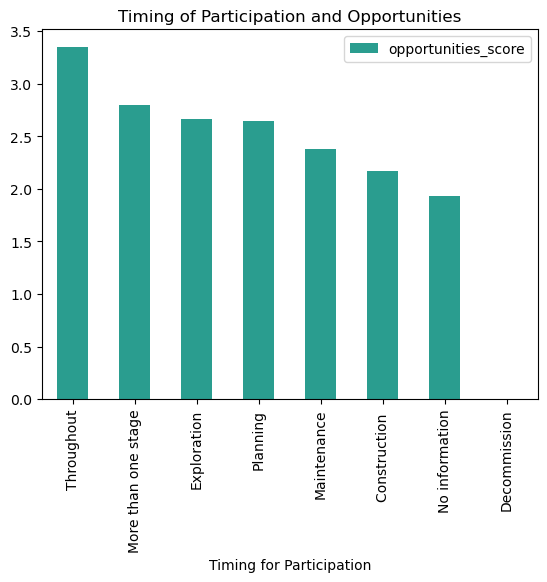

In [22]:
time.set_index('timing').plot.bar(color='#2A9D8F')
plt.xlabel("Timing for Participation", fontsize=10)
plt.title('Timing of Participation and Opportunities')

Text(0.5, 1.0, 'Moments when Participation Occurs')

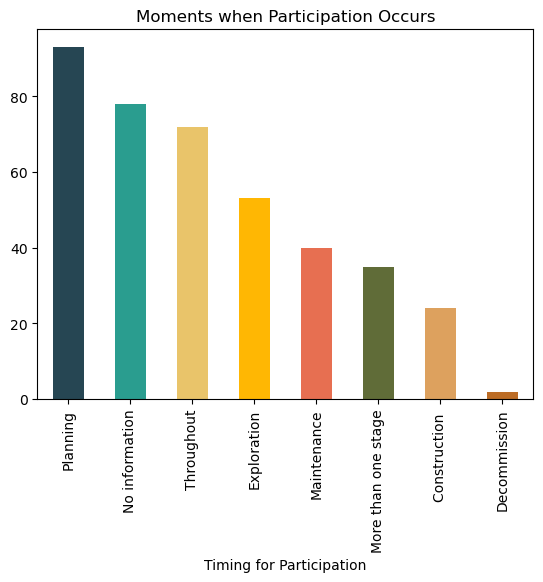

In [23]:
#Distribution of timing for participation
df['timing'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Timing for Participation", fontsize=10)
plt.title('Moments when Participation Occurs')

### 4. Models of Participation

Text(0.5, 1.0, 'Models of Participation for Alibi Participation')

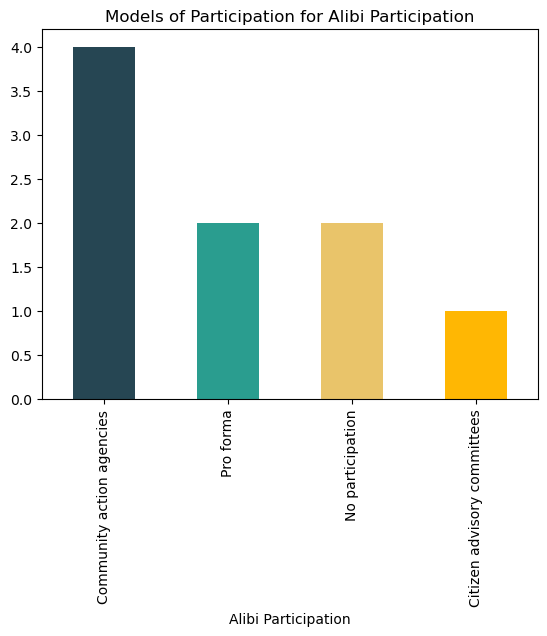

In [24]:
#frequency of models found for alibi
df['alibi'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e'])
plt.xlabel("Alibi Participation", fontsize=10)
plt.title('Models of Participation for Alibi Participation')

Text(0.5, 1.0, 'Models of Participation for Resistance')

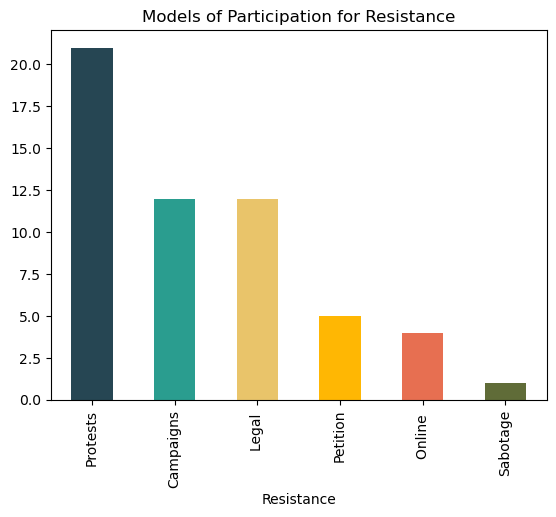

In [25]:
df['resistance'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Resistance", fontsize=10)
plt.title('Models of Participation for Resistance')

Text(0.5, 1.0, 'Models of Participation for Information')

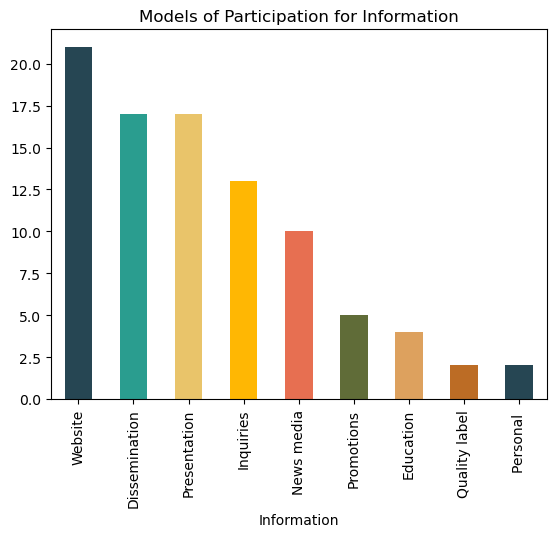

In [26]:
df['information'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Information", fontsize=10)
plt.title('Models of Participation for Information')

Text(0.5, 1.0, 'Models of Participation for Consultation')

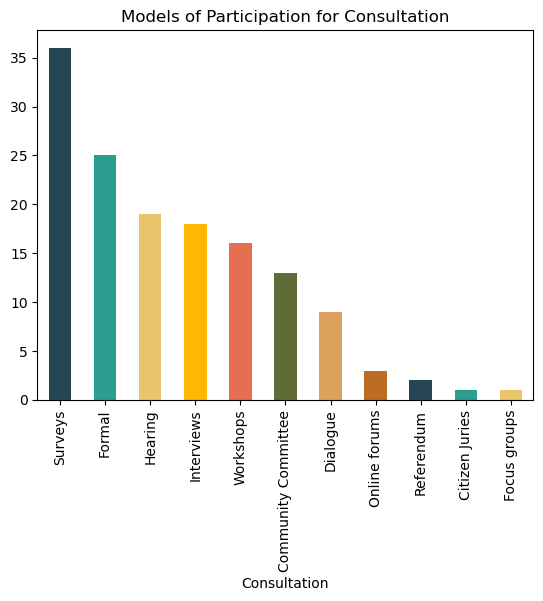

In [27]:
df['consultation '].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Consultation", fontsize=10)
plt.title('Models of Participation for Consultation')

Text(0.5, 1.0, 'Models of Participation for Financial Participation')

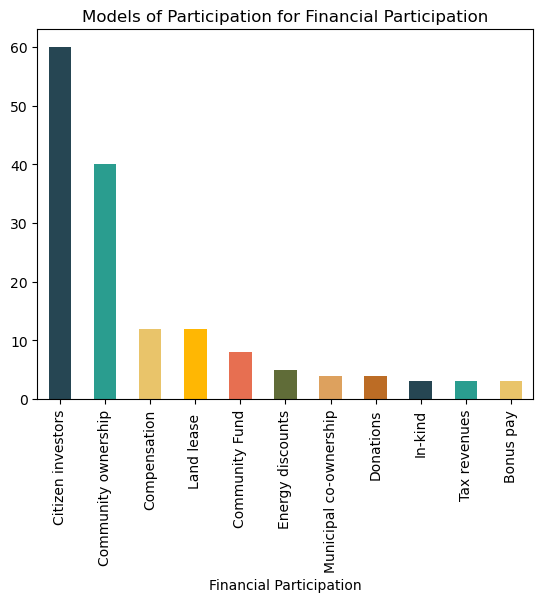

In [28]:
df['financial '].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Financial Participation", fontsize=10)
plt.title('Models of Participation for Financial Participation')

Text(0.5, 1.0, 'Models of Participation for Cooperation')

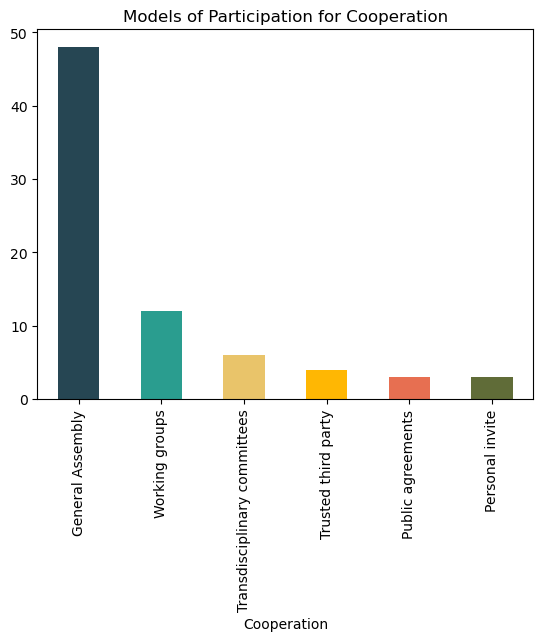

In [29]:
#frequency of models found for cooperation
df['cooperation '].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Cooperation", fontsize=10)
plt.title('Models of Participation for Cooperation')

##### Subsetting the data to check for other levels within each main level

In [30]:
#subset alibi
df2=df[df['main_level']== 'Alibi']

Text(0.5, 1.0, 'Other Levels for Alibi Participation')

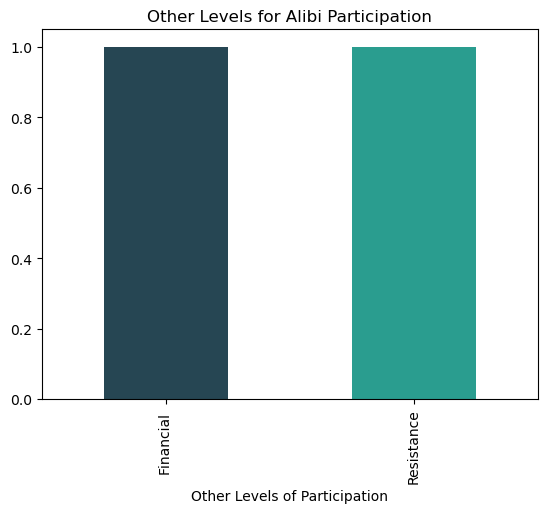

In [31]:
#checking other levels
df2['other_levels'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Other Levels of Participation", fontsize=10)
plt.title('Other Levels for Alibi Participation')

In [32]:
#subset resistance
df3=df[df['main_level']== 'Resistance']

Text(0.5, 1.0, 'Other Levels for Resistance')

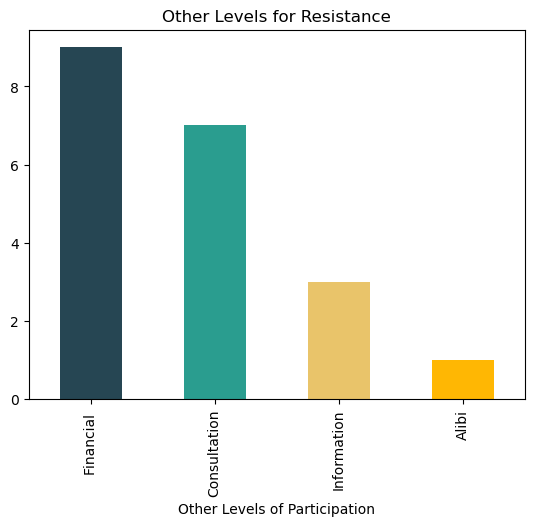

In [33]:
#checking other levels
df3['other_levels'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Other Levels of Participation", fontsize=10)
plt.title('Other Levels for Resistance')

In [34]:
#subset information
df4=df[df['main_level']== 'Information']

Text(0.5, 1.0, 'Other Levels for Information')

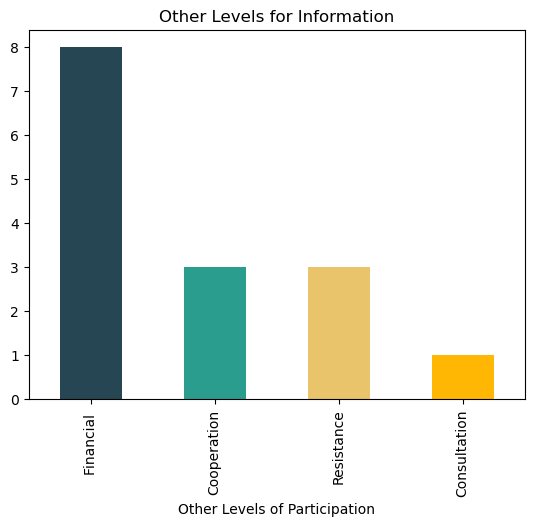

In [35]:
#checking other levels
df4['other_levels'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Other Levels of Participation", fontsize=10)
plt.title('Other Levels for Information')

In [36]:
#subset consultation
df5=df[df['main_level']== 'Consultation']

Text(0.5, 1.0, 'Other Levels for Consultation')

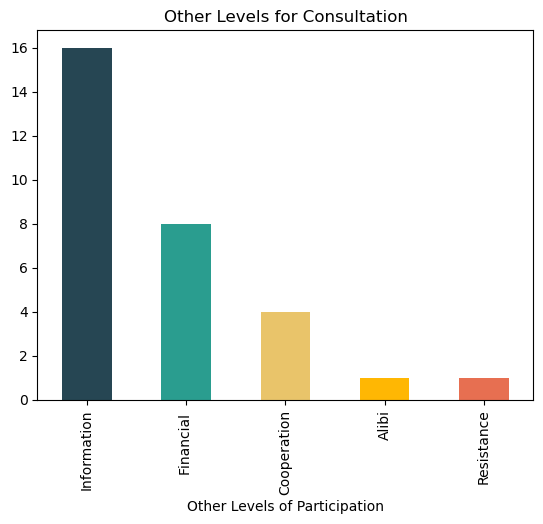

In [37]:
#checking other levels
df5['other_levels'].value_counts().plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Other Levels of Participation", fontsize=10)
plt.title('Other Levels for Consultation')

In [38]:
#subset financial
df6=df[df['main_level']== 'Financial']

Text(0.5, 1.0, 'Other Levels for Financial Participation')

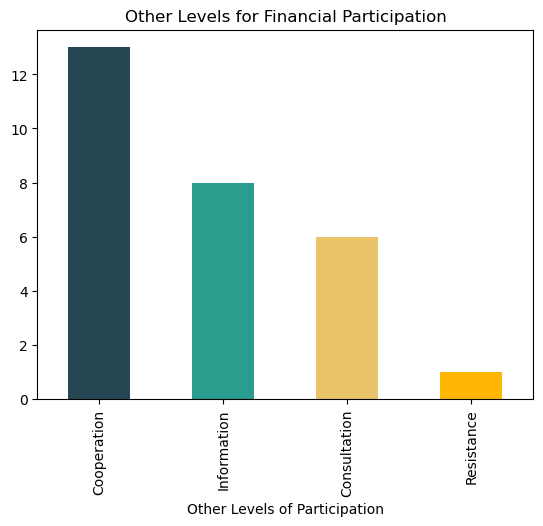

In [39]:
#checking other levels
df6['other_levels'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Other Levels of Participation", fontsize=10)
plt.title('Other Levels for Financial Participation')

In [40]:
#subset cooperation
df7=df[df['main_level']== 'Cooperation']

Text(0.5, 1.0, 'Other Levels for Cooperation')

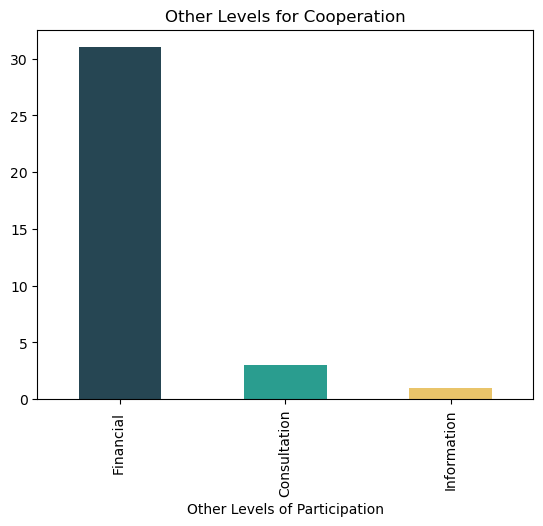

In [41]:
#checking other levels
df7['other_levels'].value_counts().T.plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Other Levels of Participation", fontsize=10)
plt.title('Other Levels for Cooperation')

In [43]:
##importing the smaller excel dataset
dfsmall = pd.read_excel(os.path.join(path, 'practices.xlsx'), index_col = False)

In [44]:
dfsmall.head()

,ID,title,social_innovation,source,year_pub,year_pro,publisher,link,province_state,country,...,innovation,tax,new jobs,tourism,energy price,property price,livelihoods,eco_imp,imp_score,perceived_imp
0,a1,Popular and institutional opposition to the Se...,Not Social Innovation,Wiki,2022,2021,EJ Atlas,https://ejatlas.org/conflict/popular-and-insti...,Catalonia,Spain,...,0,0,1,1,0,0,0,2,6,Moderate negative
1,a2,Proteste gegen Verspargelung und Flächenfraß,Other Grassroots,News media,2019,2019,deutschlandfunk Kultur,https://www.deutschlandfunkkultur.de/windenerg...,Mecklenburg-Western Pomerania,Germany,...,0,0,0,0,0,0,0,0,3,Moderate negative
2,a3,Greta Thunberg has joined a protest against wi...,Not Social Innovation,News media,2023,2021,CNN,https://edition.cnn.com/2023/03/01/europe/gret...,Fosen,Norway,...,0,0,0,0,0,0,0,0,3,Moderate negative
3,a5,Learning from the social impacts associated wi...,Not Social Innovation,Journal article,2021,2008,Impact Assessment and Project Appraisal,https://www.tandfonline.com/doi/full/10.1080/1...,Urk,Netherlands,...,1,0,0,1,0,0,1,3,6,Moderate negative
4,a7,Constructing a 'landscape justice’ for windfar...,Not Social Innovation,Journal article,2014,2014,Geoforum,https://doi.org/10.1016/j.geoforum.2014.02.012,Wales,United Kingdom,...,0,0,0,0,0,1,0,1,3,Many negative


In [45]:
dfsmall['social_innovation'].value_counts()

Not Social Innovation                    96
Rescoop                                  73
Public-Private                           43
Local Government Proj. with Citizens     38
Other Grassroots                         31
Private Company                          17
Community Development Trust              16
Name: social_innovation, dtype: int64

Text(0.5, 1.0, 'Social Innovations in Wind Energy Development')

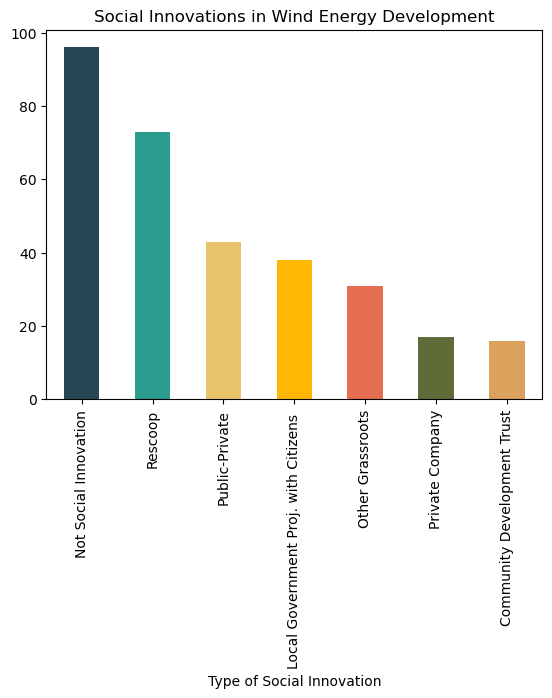

In [46]:
dfsmall['social_innovation'].value_counts().plot.bar(color=['#264653','#2A9D8F','#E9C46A','#ffb703','#E76F51','#606c38','#dda15e','#bc6c25'])
plt.xlabel("Type of Social Innovation", fontsize=10)
plt.title("Social Innovations in Wind Energy Development")